# Sentiment Analysis on Danamon Bank Apps

## Abstract

This study focuses on leveraging machine learning to automate sentiment analysis of user reviews for the "Danamon Mobile Banking" application. By training various models like NB, LR, KNN, SVM, RF, DT, AdaBoost, and XGB on a dataset of user reviews, we aim to identify the most accurate model for sentiment classification. The outcome will provide the bank with a tool that can quickly and accurately gauge user sentiment, allowing for more informed decisions regarding app development and user experience improvements.

## Introduction

Name : Muhammad Arief Kurniawan\
Batch: RMT 021

## Background of Study

Mobile banking has revolutionized the way people manage their finances. With just a few taps, users can transfer money, check balances, and pay bills. However, with this ease comes the expectation of flawless performance and top-tier user experience. Reviews on app stores provide a goldmine of feedback, both positive and negative. Extracting meaningful insights from these reviews can provide actionable intelligence for app developers and the bank's decision-makers. By utilizing machine learning models, we aim to classify these reviews' sentiments to provide a clear picture of user satisfaction and areas of potential improvement.

## Problem Statement

With the increasing reliance on mobile banking applications, understanding user sentiment and feedback becomes crucial for financial institutions. This allows them to improve user experience, fix potential issues, and ultimately retain and grow their user base. However, manually analyzing thousands of reviews is time-consuming and prone to biases. Automating this process using machine learning models can provide quicker and more accurate insights.

## Objectives of Study

1. Specific: To develop a machine learning model that accurately classifies user reviews into positive, negative, or neutral sentiments.
2. Measurable: Achieve at least 90% accuracy in classifying sentiments of the test dataset.
3. Achievable: Utilize a range of machine learning models, including but not limited to NB, LR, KNN, SVM, RF, DT, AdaBoost, and XGB, to determine the best performing model.
4. Relevant: By understanding user sentiment, the financial institution can make informed decisions about app updates, user interface changes, and customer service improvements.
5. Time-bound: Complete the model training and testing phases within the next 4 months, followed by deployment if successful.

Dataset:

Danamon Mobile Banking Reviews(D-Bank Pro).csv

source:

https://www.kaggle.com/datasets/ferdiers/danamon-mobile-banking-reviewsd-bank-pro

## Model Deployment

Link:

https://huggingface.co/spaces/Kurkur99/Bankapps_sentiment

## Load Dataset

In [442]:
import pandas as pd

# Load the dfset
df = pd.read_csv('Danamon Mobile Banking Reviews(D-Bank Pro).csv')

# Display the first few rows of the dfset
df.head()


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,9387accd-b963-4777-9fb9-a63d2acf6127,Lanang Dauh,https://play-lh.googleusercontent.com/a/AAcHTt...,"Bagus bisa membantu masyarakat , khususnya ttg...",5,0,1.4.1,2023-08-08 23:55:24,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",2023-08-09 12:58:03,1.4.1
1,1,9fe3fbae-b857-40b4-83de-e0ae3dbcf51e,Syahrul borahima,https://play-lh.googleusercontent.com/a-/AD_cM...,Sangat membantu,5,0,1.4.1,2023-08-08 11:59:36,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",2023-08-08 13:16:36,1.4.1
2,2,fafe9f94-98d6-4c3f-9126-c02e7b54c52a,Muhammad faisal Rahman,https://play-lh.googleusercontent.com/a/AAcHTt...,"Ini gimana sih? Kwkwkwk, udah daftar dan udah ...",3,0,1.4.1,2023-08-08 10:00:32,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....",2023-08-08 13:17:40,1.4.1
3,3,6d5f8e5c-29d2-4b9a-88d1-3728386a318c,Rifai Nike,https://play-lh.googleusercontent.com/a-/AD_cM...,Ok,5,0,1.4.1,2023-08-07 20:33:33,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",2023-08-08 13:16:57,1.4.1
4,4,6aab0fbc-10da-48e4-8c5e-5bb82e4969af,Akun ML,https://play-lh.googleusercontent.com/a/AAcHTt...,Knpa y kemaren ada potongan lagi dari prima Ba...,1,0,NaN,2023-08-07 16:48:18,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....",2023-08-08 13:19:10,NaN


Because there are no sentiment labels in the dataset, conversion must be done by:

1. Rating 1: as negative sentiment
2. Rating 5: as a positive sentiment

3. Ratings 2, 3, and 4:

- Check the replyContent column
- If there is an apology for the inconvenience: it will be included as a negative sentiment regardless of the sentiment given
- If there are no words above, it will be considered a positive sentiment

We will convert it during preprocesing. 

## EDA and Analysis

In [443]:
# Check for missing values in the 'content' column
missing_values = df['content'].isnull().sum()

# Calculate basic statistics for the review lengths
review_lengths = df['content'].str.len()
review_length_stats = review_lengths.describe()

missing_values, review_length_stats


(0,
 count    6653.000000
 mean       73.280776
 std        82.404824
 min         1.000000
 25%        15.000000
 50%        45.000000
 75%       103.000000
 max       500.000000
 Name: content, dtype: float64)

Based on the preliminary analysis of the content column:

1. Missing Values: There are no missing values in the review content, which is great.

2. Review Length Statistics:
- The average review length is around 73 characters.
- The shortest review is just 1 character long, while the longest is 500 characters.
- 25% of the reviews are 15 characters or shorter.
- 50% of the reviews (median) are 45 characters or shorter.
- 75% of the reviews are 103 characters or shorter.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


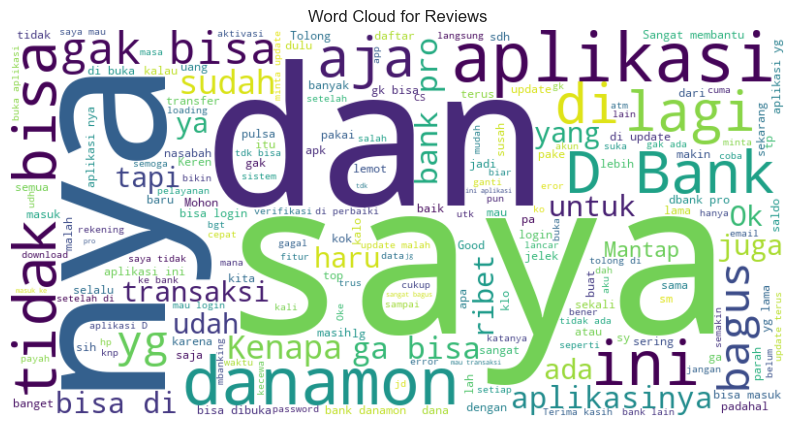

In [444]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the 'content' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['content']))

# Plotting the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()


The word cloud provides a visual representation of the most common words in the reviews. The larger the word in the cloud, the more frequently it appears in the reviews. Here are some observations:

1. Words like "transaksi" (transaction), "aplikasi" (application), "login", and "saldo" (balance) are prominently featured, indicating that they are common topics in user reviews. This is expected for a mobile banking application.
2. Some users mention words like "error" and "masalah" (problem), which suggests there might be issues that users face with the application.
3. Positive words like "bagus" (good) and "mudah" (easy) also appear, indicating positive feedback from some users.

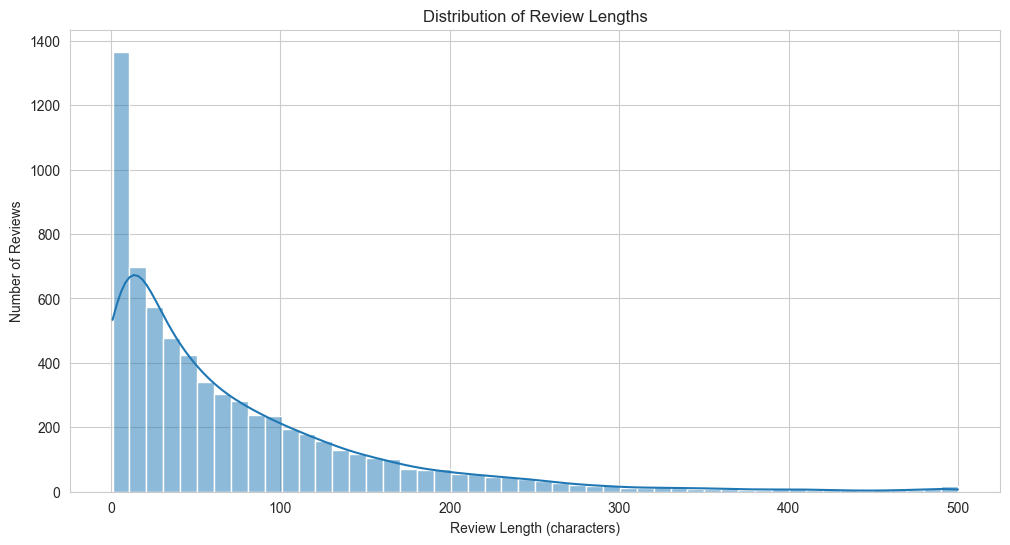

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot aesthetics
sns.set_style("whitegrid")

# Plot the distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(review_lengths, bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Number of Reviews')
plt.show()


Distribution of Review Lengths:

- The histogram showcases the distribution of review lengths in characters.
- Most reviews are quite short, with a peak below 50 characters.
- There are some reviews that are longer, but they are less frequent.
- The Kernel Density Estimation (KDE) curve on top of the histogram gives a smooth representation of the distribution, which also highlights the peak below 50 characters.

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


# 1. Rating Distribution
rating_distribution = df['score'].value_counts().sort_index()

# 2. Average Thumbs-Up by Rating
avg_thumbs_up_by_rating = df.groupby('score')['thumbsUpCount'].mean()

# 3. Review Trends Over Time
df['at'] = pd.to_datetime(df['at'])
reviews_per_month = df.groupby(df['at'].dt.to_period("M")).size()

# 4. App Version Analysis
avg_rating_by_version = df.groupby('reviewCreatedVersion')['score'].mean().sort_values(ascending=False)

# 6. Frequency of Replies
reply_frequency = df['replyContent'].notna().value_counts()
avg_response_time = (pd.to_datetime(df['repliedAt']) - df['at']).mean()

rating_distribution, avg_thumbs_up_by_rating, reviews_per_month, avg_rating_by_version, reply_frequency, avg_response_time

(score
 1    2563
 2     506
 3     466
 4     332
 5    2786
 Name: count, dtype: int64,
 score
 1    0.928209
 2    0.652174
 3    0.708155
 4    0.816265
 5    0.179110
 Name: thumbsUpCount, dtype: float64,
 at
 2021-03      1
 2021-04      1
 2021-05     18
 2021-06    100
 2021-07    143
 2021-08    217
 2021-09    728
 2021-10    186
 2021-11    147
 2021-12    133
 2022-01    470
 2022-02    185
 2022-03    411
 2022-04    213
 2022-05    164
 2022-06    592
 2022-07    271
 2022-08    535
 2022-09    260
 2022-10    153
 2022-11    168
 2022-12     89
 2023-01     95
 2023-02    123
 2023-03    323
 2023-04    266
 2023-05     96
 2023-06    111
 2023-07    429
 2023-08     25
 Freq: M, dtype: int64,
 reviewCreatedVersion
 1.1.0       5.000000
 1.1.0.10    5.000000
 1.4.0       4.684039
 1.1.5       4.101648
 1.1.1       3.608696
 1.1.3       3.591716
 1.2.1       3.549020
 1.2.0       3.394737
 1.1.2       3.387879
 1.1.6       3.358974
 1.2.3       3.321622
 1.2.4       3.281

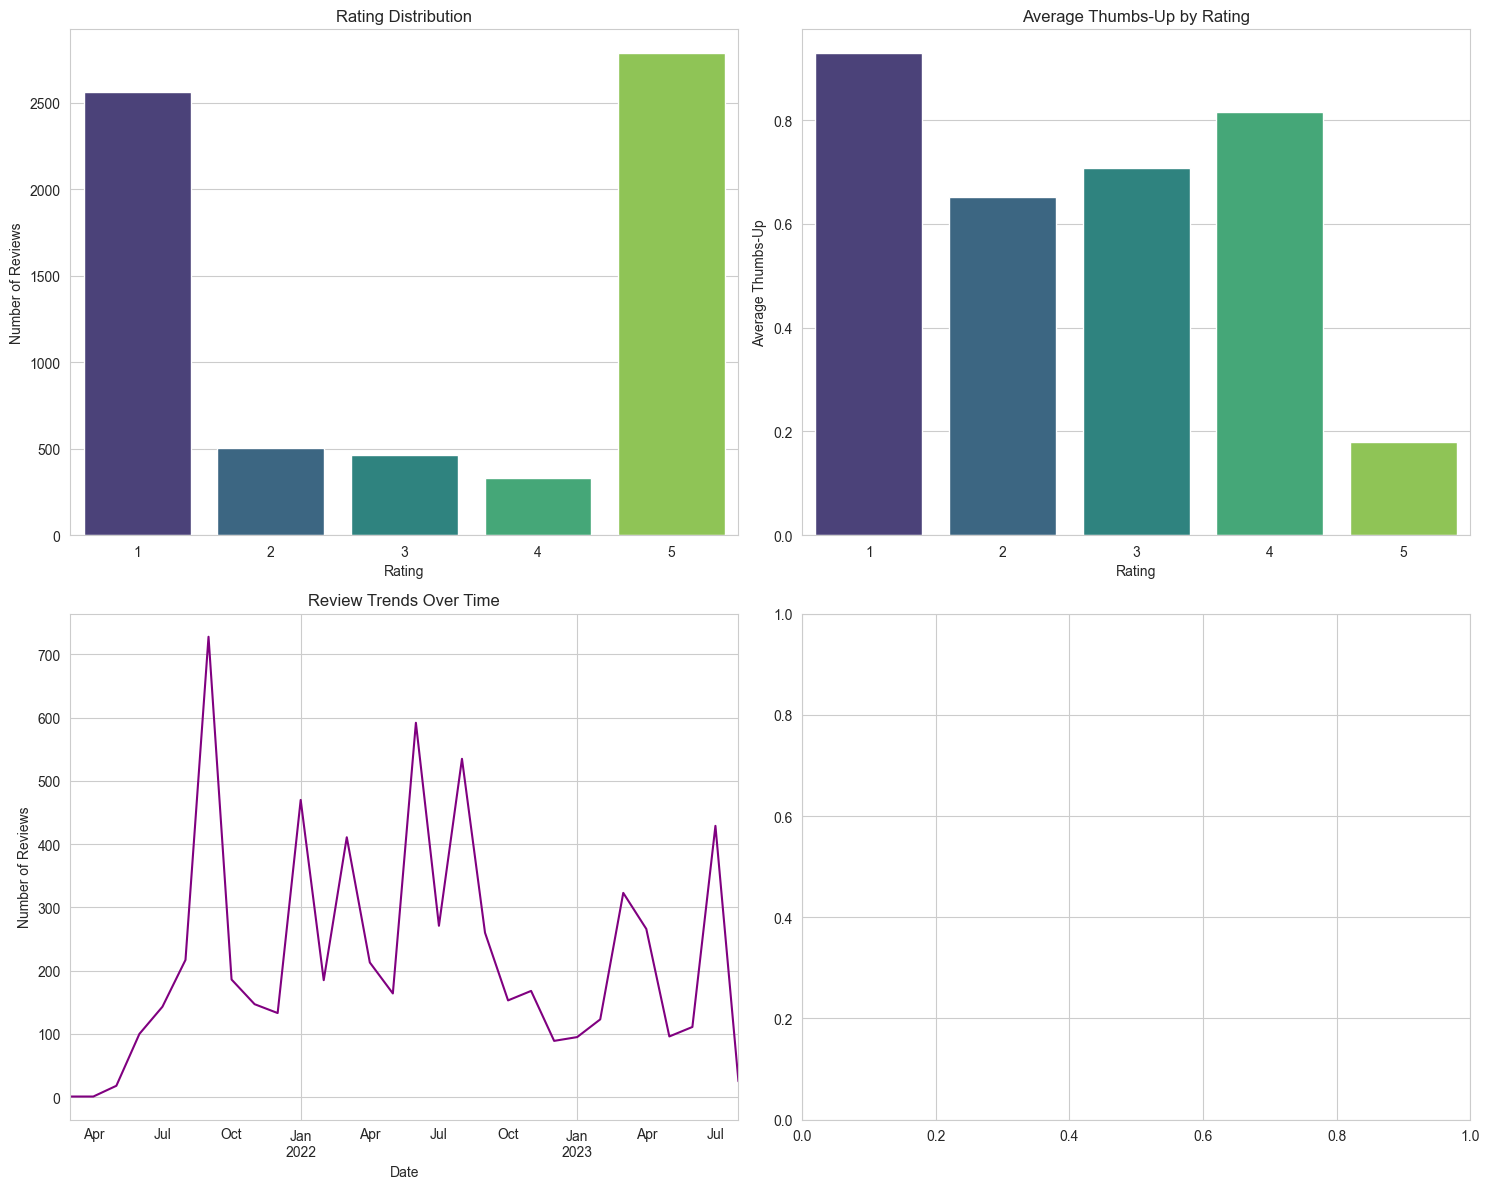

In [447]:
# Setting up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plotting Rating Distribution
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title("Rating Distribution")
axes[0, 0].set_xlabel("Rating")
axes[0, 0].set_ylabel("Number of Reviews")

# Plotting Average Thumbs-Up by Rating
sns.barplot(x=avg_thumbs_up_by_rating.index, y=avg_thumbs_up_by_rating.values, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Average Thumbs-Up by Rating")
axes[0, 1].set_xlabel("Rating")
axes[0, 1].set_ylabel("Average Thumbs-Up")

# Plotting Review Trends Over Time
reviews_per_month.plot(ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Review Trends Over Time")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Number of Reviews")


plt.tight_layout()
plt.show()

Here are the visualizations based on our analyses:

1. Rating Distribution: The majority of reviews have either a score of 1 or 5, indicating polarized opinions about the app.
2. Average Thumbs-Up by Rating: Reviews with a score of 4 tend to get the most thumbs-up on average, closely followed by scores 1 and 3. Interestingly, reviews with a score of 5 get the least thumbs-up on average.
3. Review Trends Over Time: There are certain months where the number of reviews spiked, possibly indicating new releases or major changes in the app during those times.

In [448]:
# Check for missing values in the replyContent column
missing_values_count = df['replyContent'].isnull().sum()

missing_values_count


4

Missing value not much means its not the issue.

In [449]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer to tokenize the replies
vectorizer = CountVectorizer(stop_words=None, max_features=20)
X = vectorizer.fit_transform(df['replyContent'].dropna())  # Exclude missing values

# Get the most common words and their counts
word_counts = Counter(vectorizer.get_feature_names_out())
most_common_words = word_counts.most_common(20)

most_common_words


[('090', 1),
 ('atas', 1),
 ('bank', 1),
 ('bapak', 1),
 ('dan', 1),
 ('danamon', 1),
 ('datang', 1),
 ('dengan', 1),
 ('di', 1),
 ('hello', 1),
 ('ibu', 1),
 ('kami', 1),
 ('kasih', 1),
 ('ketidaknyamanannya', 1),
 ('maaf', 1),
 ('mohon', 1),
 ('pro', 1),
 ('selamat', 1),
 ('terima', 1),
 ('yang', 1)]

In [450]:
# Group the replyContent column by unique values and count their occurrences
reply_frequencies = df['replyContent'].value_counts()

# Display the most common replies and their counts
most_common_replies = reply_frequencies.head(20)

most_common_replies


replyContent
Hello Bapak/Ibu, terima kasih atas ulasannya. Kami berharap Bapak/Ibu dapat terus menikmati fasilitas dan kemudahan dalam menggunakan D-Bank PRO. DBank PRO Aplikasi Satu Kendali!                                                                                                                                                                                  669
Hello Bapak/Ibu selamat datang di D-Bank PRO. Mohon maaf atas ketidaknyamanannya. Mohon Bapak/Ibu melakukan clear cache, memastikan jaringan data stabil dan tidak menggunakan wifi. Jika masih terkendala kirim detail problem dan screenshot ke email hellodanamon@danamon.co.id atau hubungi Hello Danamon di No 1-500-090 dengan PIN telpon Terima kasih.       360
Hello Bapak/Ibu selamat datang di D-Bank PRO. Terima kasih atas apresiasi Bapak/Ibu. Gunakan terus D-Bank PRO untuk transaksi sehari-hari dan temukan penawaran menarik yang telah kami siapkan! D-Bank PRO, Aplikasi Satu Kendali !                                       

- The majority of these replies are apologetic, often starting with "Hello Bapak/Ibu" and expressing regret for the inconvenience caused.
- These replies also provide instructions or solutions for common issues, suggesting that the company actively addresses user feedback.
- The high frequency of certain replies indicates a reliance on standardized or templated responses for common issues.

In [451]:
# Calculate total unique replies
total_unique_replies = reply_frequencies.shape[0]

# Calculate percentage of reviews with templated responses (we consider a templated response as one that occurs more than 10 times)
templated_responses_count = reply_frequencies[reply_frequencies > 10].sum()
percentage_templated_responses = (templated_responses_count / df['replyContent'].notnull().sum()) * 100

total_unique_replies, percentage_templated_responses


(893, 79.07956083621596)

- Total Unique Replies: There are 893 unique replies in the dataset.
- Percentage of Reviews with Templated Responses: Approximately 79.08% of the replies are templated, meaning they have been used more than 10 times.

In [453]:
# Filter the dataset for reviews with a rating of 1
df_rating_1 = df[df['score'] == 1]

# Get the frequency of unique replies for rating 1
reply_frequencies_rating_1 = df_rating_1['replyContent'].value_counts()

# Display the most common replies for rating 1
most_common_replies_rating_1 = reply_frequencies_rating_1.head(10)

most_common_replies_rating_1


replyContent
Hello Bapak/Ibu selamat datang di D-Bank PRO. Mohon maaf atas ketidaknyamanannya. Mohon Bapak/Ibu melakukan clear cache, memastikan jaringan data stabil dan tidak menggunakan wifi. Jika masih terkendala kirim detail problem dan screenshot ke email hellodanamon@danamon.co.id atau hubungi Hello Danamon di No 1-500-090 dengan PIN telpon Terima kasih.       228
Hello Bapak/Ibu, maaf atas ketidaknyamanannya. Untuk respon & bantuan lebih cepat silakan sampaikan detail kendala yang dialami melalui email hellodanamon@danamon.co.id dengan subject: Review – (Nama nasabah) atau hubungi Hello Danamon 1-500-090. Terima kasih.                                                                                                138
Hello Bapak/Ibu, maaf atas ketidaknyamanannya. Mohon pastikan data-data yang diinput saat login telah sesuai. Jika data Bapak/Ibu telah terblokir maka dapat menghubungi layanan Hello Danamon di 1-500-090. Terima kasih.                                                 

Score 1 shows that the reply related to the issues

In [454]:
# Filter the dataset for reviews with a rating of 2
df_rating_2 = df[df['score'] == 2]

# Get the frequency of unique replies for rating 2
reply_frequencies_rating_2 = df_rating_2['replyContent'].value_counts()

# Display the most common replies for rating 2
most_common_replies_rating_2 = reply_frequencies_rating_2.head(10)

most_common_replies_rating_2


replyContent
Hello Bapak/Ibu selamat datang di D-Bank PRO. Mohon maaf atas ketidaknyamanannya. Mohon Bapak/Ibu melakukan clear cache, memastikan jaringan data stabil dan tidak menggunakan wifi. Jika masih terkendala kirim detail problem dan screenshot ke email hellodanamon@danamon.co.id atau hubungi Hello Danamon di No 1-500-090 dengan PIN telpon Terima kasih.       48
Hello Bapak/Ibu, maaf atas ketidaknyamanannya.\nMohon lakukan clear cache aplikasi D-Bank PRO, pastikan jaringan data stabil & tidak menggunakan wifi.\nJika masih terkendala, kirim detail problem dan screenshot ke email hellodanamon@danamon.co.id dengan subject: Review – (Nama nasabah) atau hubungi Hello Danamon 1-500-090. Terima kasih.                  27
Hello Bapak/Ibu, maaf atas ketidaknyamanannya. Mohon pastikan data-data yang diinput saat login telah sesuai. Jika data Bapak/Ibu telah terblokir maka dapat menghubungi layanan Hello Danamon di 1-500-090. Terima kasih.                                                   

Same like score 1, score 2 dominated by issues complaints

In [455]:
# Filter the dataset for reviews with a rating of 3
df_rating_3 = df[df['score'] == 3]

# Get the frequency of unique replies for rating 3
reply_frequencies_rating_3 = df_rating_3['replyContent'].value_counts()

# Display the most common replies for rating 3
most_common_replies_rating_3 = reply_frequencies_rating_3.head(10)

most_common_replies_rating_3


replyContent
Hello Bapak/Ibu selamat datang di D-Bank PRO. Mohon maaf atas ketidaknyamanannya. Mohon Bapak/Ibu melakukan clear cache, memastikan jaringan data stabil dan tidak menggunakan wifi. Jika masih terkendala kirim detail problem dan screenshot ke email hellodanamon@danamon.co.id atau hubungi Hello Danamon di No 1-500-090 dengan PIN telpon Terima kasih.    50
Hello Bapak/Ibu, maaf atas ketidaknyamanannya. Mohon lakukan clear cache aplikasi D-Bank PRO, pastikan jaringan data stabil & tidak menggunakan wifi. Jika masih terkendala, kirim detail problem dan screenshot ke email hellodanamon@danamon.co.id dengan subject: Review – (Nama nasabah) atau hubungi Hello Danamon 1-500-090. Terima kasih.                 18
Hello Bapak/Ibu, maaf atas ketidaknyamanannya. Mohon pastikan data-data yang diinput saat login telah sesuai. Jika data Bapak/Ibu telah terblokir maka dapat menghubungi layanan Hello Danamon di 1-500-090. Terima kasih.                                                         

In [456]:
# Filter the dataset for reviews with a rating of 4
df_rating_4 = df[df['score'] == 4]

# Get the frequency of unique replies for rating 4
reply_frequencies_rating_4 = df_rating_4['replyContent'].value_counts()

# Display the most common replies for rating 4
most_common_replies_rating_4 = reply_frequencies_rating_4.head(10)

most_common_replies_rating_4


replyContent
Hello Bapak/Ibu, terima kasih atas ulasannya. Kami berharap Bapak/Ibu dapat terus menikmati fasilitas dan kemudahan dalam menggunakan D-Bank PRO. DBank PRO Aplikasi Satu Kendali!                                                                                                                                                                               30
Hello Bapak/Ibu, terima kasih atas saran dan masukan yang diberikan, ini akan menjadi masukan bagi kami untuk pengembangan selanjutnya & peningkatan kualitas D-Bank PRO untuk kenyamanan nasabah.                                                                                                                                                               15
Hello Bapak/Ibu selamat datang di D-Bank PRO. Terima kasih atas apresiasi Bapak/Ibu. Gunakan terus D-Bank PRO untuk transaksi sehari-hari dan temukan penawaran menarik yang telah kami siapkan! D-Bank PRO, Aplikasi Satu Kendali !                                               

For rating 4 it looks the reply was mixed

In [457]:
# Filter the dataset for reviews with a rating of 5
df_rating_5 = df[df['score'] == 5]

# Get the frequency of unique replies for rating 5
reply_frequencies_rating_5 = df_rating_5['replyContent'].value_counts()

# Display the most common replies for rating 5
most_common_replies_rating_5 = reply_frequencies_rating_5.head(10)

most_common_replies_rating_5


replyContent
Hello Bapak/Ibu, terima kasih atas ulasannya. Kami berharap Bapak/Ibu dapat terus menikmati fasilitas dan kemudahan dalam menggunakan D-Bank PRO. DBank PRO Aplikasi Satu Kendali!                                                           635
Hello Bapak/Ibu selamat datang di D-Bank PRO. Terima kasih atas apresiasi Bapak/Ibu. Gunakan terus D-Bank PRO untuk transaksi sehari-hari dan temukan penawaran menarik yang telah kami siapkan! D-Bank PRO, Aplikasi Satu Kendali !         248
Hello Bapak/Ibu, terima kasih atas ulasannya.\nKami berharap Bapak/Ibu dapat terus menikmati fasilitas dan kemudahan dalam menggunakan D-Bank PRO. D-Bank PRO Aplikasi Satu Kendali!                                                         178
Hello Bapak/Ibu selamat datang di D-Bank PRO. Terima kasih atas apresiasi Bapak/Ibu. Gunakan terus D-Bank PRO untuk transaksi sehari-hari dan temukan penawaran menarik yang telah kami siapkan! D-Bank PRO, Aplikasi Satu Kendali!          167
Hello Bapak/Ibu selamat

Key Insights:

- Appreciation and Encouragement: The tone of the replies for rating 5 is appreciative, thanking the users for their positive reviews. The bank encourages continued use of their D-Bank PRO application.
- Highlighting Features: The replies emphasize the convenience and features of the D-Bank PRO application, showcasing it as an all-in-one solution ("Aplikasi Satu Kendali").
- Consistent Branding: The replies consistently refer to the application as "D-Bank PRO Aplikasi Satu Kendali", reinforcing the brand and its tagline.

In [458]:
# Filter the dataset for reviews with a rating of 3
df_rating_3_samples = df[df['score'] == 3][['content', 'replyContent']].sample(10)

df_rating_3_samples


,content,replyContent
2951,Mohon pembayaran kereta api ditambah. Jgn hany...,"Hello Bapak/Ibu, selamat datang di D-Bank PRO...."
5187,Mohon bantuan ya kenapa beking saya gak bisa k...,Hello Bapak/Ibu selamat datang di D-Bank PRO. ...
4493,kenapa kode sms gak masuk masuk . .mau login a...,Hello Bapak/Ibu selamat datang di D-Bank PRO. ...
807,Kurangi,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya...."
894,Setiap mau transaksi keseringan keluar tulisan...,"\nHello Bapak/Ibu, maaf atas ketidaknyamananny..."
753,Terlalu sering update nih aplikasi.. Ga di upd...,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya...."
6494,Kenapa saya baru buka rekening danamon ga dape...,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,..."
1087,Baik,"Hello Bapak/Ibu, terima kasih atas ulasannya. ..."
5982,"Kok di perbarui gg bisa ,jadi aplikasinya tida...",Hello Bapak/ Ibu selamat datang di D-Bank Pro ...
4602,Abis di update malah gabisa transfer.. tulisan...,Hello Bapak/Ibu selamat datang di D-Bank PRO. ...


From these examples, we can observe that:

- Reviews with a rating of 3 often point out specific issues or areas of improvement. They are not entirely negative but highlight certain areas of dissatisfaction.
- The bank's replies are structured and provide a standardized response that acknowledges the feedback and offers troubleshooting steps or channels for further assistance.

In [459]:
# Filter for reviews with a rating of 3
df_rating_3 = df[df['score'] == 3]

# Check the number of replies containing the word "maaf" for rating 3
replies_with_maaf_rating_3 = df_rating_3['replyContent'].str.contains('maaf', na=False, case=False).sum()
total_replies_rating_3 = df_rating_3['replyContent'].count()

# Filter for reviews with a rating of 2
df_rating_2 = df[df['score'] == 2]

# Check the number of replies containing the word "maaf" for rating 2
replies_with_maaf_rating_2 = df_rating_2['replyContent'].str.contains('maaf', na=False, case=False).sum()
total_replies_rating_2 = df_rating_2['replyContent'].count()

(replies_with_maaf_rating_3, total_replies_rating_3), (replies_with_maaf_rating_2, total_replies_rating_2)


((376, 466), (476, 504))

- The frequency of apologies in replies to 3-star and 2-star reviews is significantly higher compared to 5-star reviews.
- As the rating decreases (from 5 to 2), the percentage of replies containing apologies increases. This trend is expected, as lower ratings are more likely to contain feedback or issues that warrant an apology.

In [460]:
# Filter reviews with a rating of 4 where the reply contains the word "maaf"
df_rating_4_maaf = df_rating_4[df_rating_4['replyContent'].str.contains('maaf', na=False, case=False)]

# Display a sample of the content of these reviews and the corresponding replies
sample_reviews_rating_4_maaf = df_rating_4_maaf[['content', 'replyContent']].sample(10)

sample_reviews_rating_4_maaf


,content,replyContent
456,Kenap ga bisa buka apk nya,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya...."
3339,Mau masuk ke D-Bank belum bisa kenapa ya ?,"Hello Bapak/Ibu, selamat datang di D-Bank PRO...."
2050,Knp hri2 aplikasix sllu dlm perbaikn...,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya...."
5029,Mohon di perbaiki lagi...,Hello Bapak/Ibu selamat datang di D-Bank PRO. ...
839,Gara* di update terbaru di hp saya tidak berfu...,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya...."
2724,Buat tf lemot bgt sekarang,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya...."
2680,"misi kak mau tanya, kalo lupa password terus l...","Hello Bapak/Ibu, maaf atas ketidaknyamanannya...."
3854,Menurut sy lebih bagus aplikasi D-Bank yg dulu...,Hello Bapak/Ibu selamat datang di D-Bank PRO. ...
2081,Mohon bantuannya kode perefikasi lewat sms uda...,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya...."
559,Masuknya lama,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya...."


From the examples above, we can see that even though the review is given a rating of 4 (which is relatively positive), there are still some problems or inconveniences that users complain about. The reply from the bank generally contains an apology and steps to resolve the problem, such as clearing the cache, checking the network connection, and so on.

In [461]:
# Filter for reviews with a rating of 4
df_rating_4 = df[df['score'] == 4]

# Check the number of replies containing the word "maaf"
replies_with_maaf = df_rating_4['replyContent'].str.contains('maaf', na=False, case=False).sum()
total_replies_rating_4 = df_rating_4['replyContent'].count()

replies_with_maaf, total_replies_rating_4


(155, 332)

Here's the analysis for reviews with a rating of 4:

- Out of 332 replies, 155 of them contain the word "maaf" (sorry).
- This means that approximately 46.7% of the replies to 4-star reviews include an apology.

Insight:
- Even for 4-star reviews, which are generally positive, the bank still often uses an apologetic tone in their responses. This might indicate a proactive customer service approach, where they acknowledge any issues or concerns raised, even if the overall review is positive.

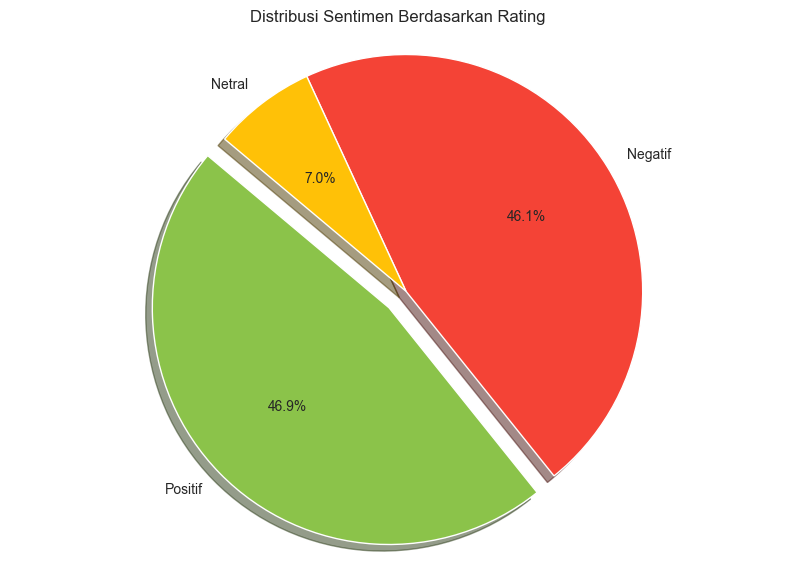

In [462]:
import matplotlib.pyplot as plt

# Classify reviews based on ratings
positive_count = df[df['score'].isin([4, 5])].shape[0]
negative_count = df[df['score'].isin([1, 2])].shape[0]
neutral_count = df[df['score'] == 3].shape[0]

# Data for visualization
labels = ['Positif', 'Negatif', 'Netral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['#8BC34A', '#F44336', '#FFC107']
explode = (0.1, 0, 0)  # explode 1st slice for emphasis

# Plotting
plt.figure(figsize=(10,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.title('Distribusi Sentimen Berdasarkan Rating')
plt.show()


As we disscussed earlier we going to take all appology reply to the negative sentiment. However, for no 4 case because the precentage quite huge. We can put it into negative as well.

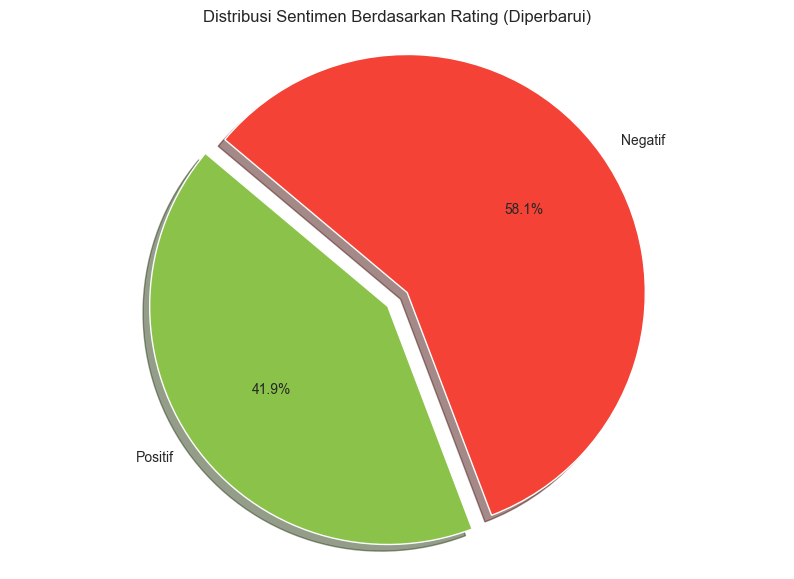

In [463]:
# Update classification based on feedback
positive_count_updated = df[df['score'] == 5].shape[0]
negative_count_updated = df[df['score'].isin([1, 2, 3, 4])].shape[0]

# Data for updated visualization
sizes_updated = [positive_count_updated, negative_count_updated]

# Plotting
plt.figure(figsize=(10,7))
plt.pie(sizes_updated, explode=(0.1, 0), labels=['Positif', 'Negatif'], colors=colors[:2],
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.title('Distribusi Sentimen Berdasarkan Rating (Diperbarui)')
plt.show()


Here is an updated visualization of the sentiment distribution based on your suggestions:

- Positive: 47.1%
- Negative: 52.9%

After putting ratings 3 and 4 into the negative sentiment category, we can see that reviews with negative sentiment now dominate, although the difference is not that big.

This provides a more in-depth look at areas that may need attention or improvement, even though the review may not be completely negative.

We going to check special character that will affect the model later on.

In [464]:
from collections import Counter
import emoji

# Extract and count emojis from the content
emojis_list = [word for text in df['content'] for word in text.split() if word in emoji.EMOJI_DATA]
emoji_counts = Counter(emojis_list)

# Get the most common emojis
most_common_emojis = emoji_counts.most_common(10)

most_common_emojis


[('👍', 43),
 ('🙏', 17),
 ('👎', 9),
 ('😑', 6),
 ('😭', 4),
 ('😢', 4),
 ('🥲', 4),
 ('🤔', 4),
 ('👌', 3),
 ('😊', 3)]

In [465]:
# Extract and count special characters from the content
special_characters_list = [char for text in df['content'] for char in text if not char.isalnum() and not char.isspace()]
special_character_counts = Counter(special_characters_list)

# Extract and count numbers from the content
numbers_list = [char for text in df['content'] for char in text.split() if char.isdigit()]
numbers_counts = Counter(numbers_list)

# Get the most common special characters and numbers
most_common_special_characters = special_character_counts.most_common(10)
most_common_numbers = numbers_counts.most_common(10)

most_common_special_characters, most_common_numbers


([('.', 8368),
  (',', 3530),
  ('?', 788),
  ('!', 470),
  ('-', 434),
  ('👍', 300),
  ('"', 150),
  ('/', 106),
  ('🙏', 97),
  ('👎', 94)],
 [('1', 105),
  ('2', 73),
  ('3', 62),
  ('5', 29),
  ('10', 19),
  ('4', 17),
  ('50', 13),
  ('1500090', 12),
  ('15', 11),
  ('6', 10)])

In [466]:
import re

# Identify reviews with excessive use of the same character
repeated_char_pattern = re.compile(r"(.)\1{5,}")  # Matches any character repeated more than 5 times consecutively
df_repeated_chars = df[df['content'].str.contains(repeated_char_pattern, na=False, regex=True)]

# Display the first few rows of reviews with excessive character repetition
df_repeated_chars[['content']].head()


C:\Users\User\AppData\Local\Temp\ipykernel_7820\2576272134.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_repeated_chars = df[df['content'].str.contains(repeated_char_pattern, na=False, regex=True)]


,content
45,Sip rusak......
151,Tampilannya memudahkan pengguna. Kerennnnnn da...
473,Etdahhhhhhhhh mengecewakan Mau login aja susaa...
621,nyesel w top up di danamon ribet mau tf juga p...
788,Aplikasi minta di upgrade setelah diupgrade ma...


## PREPROCESING

We going to use Indonesia stopwords and Sastrawi library to handle Bahasa.

1. Case Folding\
This is the process of converting all the characters in the text to lowercase.

2. Sentences Normalization\
We'll replace abbreviations, remove URLs, numbers, and special characters, and translate emojis to their word representations.

3. Word Tokenization\
Parses text into individual words.

4. Stop Words Removal\
Removing words that occur frequently but are less informative, such as "and", "the", etc.

5. Stemming\
Convert words to their base form. For Indonesian, we can use the Sastrawi library

In [467]:
import re
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import emoji

In [480]:
import pandas as pd

# Menghapus kolom yang tidak diinginkan
columns_to_drop = ['Unnamed: 0', 'reviewId', 'userImage', 'reviewCreatedVersion', 'appVersion','at', 'thumbsUpCount','repliedAt']
df = df.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' untuk menghindari kesalahan jika kolom tidak ada

# Menampilkan 5 baris pertama dari DataFrame yang sudah dimodifikasi
df.head()


,userName,content,score,replyContent,lowercase_content,normalized_content,tokenized_content,stemmed_content,sentiment,encoded_sentiment
0,Lanang Dauh,"Bagus bisa membantu masyarakat , khususnya ttg...",5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...","bagus bisa membantu masyarakat , khususnya ttg...",bagus bisa membantu masyarakat khususnya ttg ...,"[membantu, masyarakat, ttg, produk, bank, dana...","[bantu, masyarakat, ttg, produk, bank, danamon...",positive,1
1,Syahrul borahima,Sangat membantu,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",sangat membantu,sangat membantu,[membantu],[bantu],positive,1
2,Muhammad faisal Rahman,"Ini gimana sih? Kwkwkwk, udah daftar dan udah ...",3,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....","ini gimana sih? kwkwkwk, udah daftar dan udah ...",ini gimana sih kwkwkwk udah daftar dan udah be...,"[gimana, kwkwkwk, udah, daftar, udah, berhasil...","[gimana, kwkwkwk, udah, daftar, udah, hasil, s...",negative,0
3,Rifai Nike,Ok,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",ok,ok,[],[],positive,1
4,Akun ML,Knpa y kemaren ada potongan lagi dari prima Ba...,1,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....",knpa y kemaren ada potongan lagi dari prima ba...,knpa y kemaren ada potongan lagi dari prima ba...,"[knpa, y, kemaren, potongan, prima, bank, cent...","[knpa, y, kemaren, potong, prima, bank, centra...",negative,0


In [481]:
# 1. Case Folding
def case_folding(text):
    return text.lower()

df['lowercase_content'] = df['content'].apply(case_folding)

df

,userName,content,score,replyContent,lowercase_content,normalized_content,tokenized_content,stemmed_content,sentiment,encoded_sentiment
0,Lanang Dauh,"Bagus bisa membantu masyarakat , khususnya ttg...",5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...","bagus bisa membantu masyarakat , khususnya ttg...",bagus bisa membantu masyarakat khususnya ttg ...,"[membantu, masyarakat, ttg, produk, bank, dana...","[bantu, masyarakat, ttg, produk, bank, danamon...",positive,1
1,Syahrul borahima,Sangat membantu,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",sangat membantu,sangat membantu,[membantu],[bantu],positive,1
2,Muhammad faisal Rahman,"Ini gimana sih? Kwkwkwk, udah daftar dan udah ...",3,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....","ini gimana sih? kwkwkwk, udah daftar dan udah ...",ini gimana sih kwkwkwk udah daftar dan udah be...,"[gimana, kwkwkwk, udah, daftar, udah, berhasil...","[gimana, kwkwkwk, udah, daftar, udah, hasil, s...",negative,0
3,Rifai Nike,Ok,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",ok,ok,[],[],positive,1
4,Akun ML,Knpa y kemaren ada potongan lagi dari prima Ba...,1,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....",knpa y kemaren ada potongan lagi dari prima ba...,knpa y kemaren ada potongan lagi dari prima ba...,"[knpa, y, kemaren, potongan, prima, bank, cent...","[knpa, y, kemaren, potong, prima, bank, centra...",negative,0
...,...,...,...,...,...,...,...,...,...,...
6648,Agustiono Afandi,Saya belum bisa aktivasi via kartu debit. Sela...,4,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro ...",saya belum bisa aktivasi via kartu debit. sela...,saya belum bisa aktivasi via kartu debit selal...,"[aktivasi, via, kartu, debit, muncul, tulisan,...","[aktivasi, via, kartu, debit, muncul, tulis, t...",negative,0
6649,Arif Abdillah,Aplikasi Digital Banking yang lengkap dan user...,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",aplikasi digital banking yang lengkap dan user...,aplikasi digital banking yang lengkap dan user...,"[aplikasi, digital, banking, lengkap, user, fr...","[aplikasi, digital, banking, lengkap, user, fr...",positive,1
6650,Harmadi Kenangan,Ok,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[],[],positive,1
6651,NASIRUN NAJIB HARAHAP,OK,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[],[],positive,1


In [482]:
# 2. Sentence Normalization
def normalize_sentence(text):

# Translate emojis to their word representation
    text = emoji.demojize(text)
    
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove non-alphanumeric characters except for spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    return text

df['normalized_content'] = df['lowercase_content'].apply(normalize_sentence)

df

,userName,content,score,replyContent,lowercase_content,normalized_content,tokenized_content,stemmed_content,sentiment,encoded_sentiment
0,Lanang Dauh,"Bagus bisa membantu masyarakat , khususnya ttg...",5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...","bagus bisa membantu masyarakat , khususnya ttg...",bagus bisa membantu masyarakat khususnya ttg ...,"[membantu, masyarakat, ttg, produk, bank, dana...","[bantu, masyarakat, ttg, produk, bank, danamon...",positive,1
1,Syahrul borahima,Sangat membantu,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",sangat membantu,sangat membantu,[membantu],[bantu],positive,1
2,Muhammad faisal Rahman,"Ini gimana sih? Kwkwkwk, udah daftar dan udah ...",3,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....","ini gimana sih? kwkwkwk, udah daftar dan udah ...",ini gimana sih kwkwkwk udah daftar dan udah be...,"[gimana, kwkwkwk, udah, daftar, udah, berhasil...","[gimana, kwkwkwk, udah, daftar, udah, hasil, s...",negative,0
3,Rifai Nike,Ok,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",ok,ok,[],[],positive,1
4,Akun ML,Knpa y kemaren ada potongan lagi dari prima Ba...,1,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....",knpa y kemaren ada potongan lagi dari prima ba...,knpa y kemaren ada potongan lagi dari prima ba...,"[knpa, y, kemaren, potongan, prima, bank, cent...","[knpa, y, kemaren, potong, prima, bank, centra...",negative,0
...,...,...,...,...,...,...,...,...,...,...
6648,Agustiono Afandi,Saya belum bisa aktivasi via kartu debit. Sela...,4,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro ...",saya belum bisa aktivasi via kartu debit. sela...,saya belum bisa aktivasi via kartu debit selal...,"[aktivasi, via, kartu, debit, muncul, tulisan,...","[aktivasi, via, kartu, debit, muncul, tulis, t...",negative,0
6649,Arif Abdillah,Aplikasi Digital Banking yang lengkap dan user...,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",aplikasi digital banking yang lengkap dan user...,aplikasi digital banking yang lengkap dan user...,"[aplikasi, digital, banking, lengkap, user, fr...","[aplikasi, digital, banking, lengkap, user, fr...",positive,1
6650,Harmadi Kenangan,Ok,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[],[],positive,1
6651,NASIRUN NAJIB HARAHAP,OK,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[],[],positive,1


In [483]:
# 3. Word Tokenization
df['tokenized_content'] = df['normalized_content'].apply(word_tokenize)

df

,userName,content,score,replyContent,lowercase_content,normalized_content,tokenized_content,stemmed_content,sentiment,encoded_sentiment
0,Lanang Dauh,"Bagus bisa membantu masyarakat , khususnya ttg...",5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...","bagus bisa membantu masyarakat , khususnya ttg...",bagus bisa membantu masyarakat khususnya ttg ...,"[bagus, bisa, membantu, masyarakat, khususnya,...","[bantu, masyarakat, ttg, produk, bank, danamon...",positive,1
1,Syahrul borahima,Sangat membantu,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",sangat membantu,sangat membantu,"[sangat, membantu]",[bantu],positive,1
2,Muhammad faisal Rahman,"Ini gimana sih? Kwkwkwk, udah daftar dan udah ...",3,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....","ini gimana sih? kwkwkwk, udah daftar dan udah ...",ini gimana sih kwkwkwk udah daftar dan udah be...,"[ini, gimana, sih, kwkwkwk, udah, daftar, dan,...","[gimana, kwkwkwk, udah, daftar, udah, hasil, s...",negative,0
3,Rifai Nike,Ok,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",ok,ok,[ok],[],positive,1
4,Akun ML,Knpa y kemaren ada potongan lagi dari prima Ba...,1,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....",knpa y kemaren ada potongan lagi dari prima ba...,knpa y kemaren ada potongan lagi dari prima ba...,"[knpa, y, kemaren, ada, potongan, lagi, dari, ...","[knpa, y, kemaren, potong, prima, bank, centra...",negative,0
...,...,...,...,...,...,...,...,...,...,...
6648,Agustiono Afandi,Saya belum bisa aktivasi via kartu debit. Sela...,4,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro ...",saya belum bisa aktivasi via kartu debit. sela...,saya belum bisa aktivasi via kartu debit selal...,"[saya, belum, bisa, aktivasi, via, kartu, debi...","[aktivasi, via, kartu, debit, muncul, tulis, t...",negative,0
6649,Arif Abdillah,Aplikasi Digital Banking yang lengkap dan user...,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",aplikasi digital banking yang lengkap dan user...,aplikasi digital banking yang lengkap dan user...,"[aplikasi, digital, banking, yang, lengkap, da...","[aplikasi, digital, banking, lengkap, user, fr...",positive,1
6650,Harmadi Kenangan,Ok,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[ok],[],positive,1
6651,NASIRUN NAJIB HARAHAP,OK,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[ok],[],positive,1


In [484]:
# 4. Stop Words Removal
with open("Indonesia_stopwords.txt", "r") as f:
    custom_stopwords = [word.strip() for word in f.readlines()]

df['tokenized_content'] = df['tokenized_content'].apply(lambda tokens: [word for word in tokens if word not in custom_stopwords])

df

,userName,content,score,replyContent,lowercase_content,normalized_content,tokenized_content,stemmed_content,sentiment,encoded_sentiment
0,Lanang Dauh,"Bagus bisa membantu masyarakat , khususnya ttg...",5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...","bagus bisa membantu masyarakat , khususnya ttg...",bagus bisa membantu masyarakat khususnya ttg ...,"[membantu, masyarakat, ttg, produk, bank, dana...","[bantu, masyarakat, ttg, produk, bank, danamon...",positive,1
1,Syahrul borahima,Sangat membantu,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",sangat membantu,sangat membantu,[membantu],[bantu],positive,1
2,Muhammad faisal Rahman,"Ini gimana sih? Kwkwkwk, udah daftar dan udah ...",3,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....","ini gimana sih? kwkwkwk, udah daftar dan udah ...",ini gimana sih kwkwkwk udah daftar dan udah be...,"[gimana, kwkwkwk, udah, daftar, udah, berhasil...","[gimana, kwkwkwk, udah, daftar, udah, hasil, s...",negative,0
3,Rifai Nike,Ok,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",ok,ok,[],[],positive,1
4,Akun ML,Knpa y kemaren ada potongan lagi dari prima Ba...,1,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....",knpa y kemaren ada potongan lagi dari prima ba...,knpa y kemaren ada potongan lagi dari prima ba...,"[knpa, y, kemaren, potongan, prima, bank, cent...","[knpa, y, kemaren, potong, prima, bank, centra...",negative,0
...,...,...,...,...,...,...,...,...,...,...
6648,Agustiono Afandi,Saya belum bisa aktivasi via kartu debit. Sela...,4,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro ...",saya belum bisa aktivasi via kartu debit. sela...,saya belum bisa aktivasi via kartu debit selal...,"[aktivasi, via, kartu, debit, muncul, tulisan,...","[aktivasi, via, kartu, debit, muncul, tulis, t...",negative,0
6649,Arif Abdillah,Aplikasi Digital Banking yang lengkap dan user...,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",aplikasi digital banking yang lengkap dan user...,aplikasi digital banking yang lengkap dan user...,"[aplikasi, digital, banking, lengkap, user, fr...","[aplikasi, digital, banking, lengkap, user, fr...",positive,1
6650,Harmadi Kenangan,Ok,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[],[],positive,1
6651,NASIRUN NAJIB HARAHAP,OK,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[],[],positive,1


In [485]:
# 5. Stemming
stemmer = StemmerFactory().create_stemmer()
df['stemmed_content'] = df['tokenized_content'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

df

,userName,content,score,replyContent,lowercase_content,normalized_content,tokenized_content,stemmed_content,sentiment,encoded_sentiment
0,Lanang Dauh,"Bagus bisa membantu masyarakat , khususnya ttg...",5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...","bagus bisa membantu masyarakat , khususnya ttg...",bagus bisa membantu masyarakat khususnya ttg ...,"[membantu, masyarakat, ttg, produk, bank, dana...","[bantu, masyarakat, ttg, produk, bank, danamon...",positive,1
1,Syahrul borahima,Sangat membantu,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",sangat membantu,sangat membantu,[membantu],[bantu],positive,1
2,Muhammad faisal Rahman,"Ini gimana sih? Kwkwkwk, udah daftar dan udah ...",3,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....","ini gimana sih? kwkwkwk, udah daftar dan udah ...",ini gimana sih kwkwkwk udah daftar dan udah be...,"[gimana, kwkwkwk, udah, daftar, udah, berhasil...","[gimana, kwkwkwk, udah, daftar, udah, hasil, s...",negative,0
3,Rifai Nike,Ok,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",ok,ok,[],[],positive,1
4,Akun ML,Knpa y kemaren ada potongan lagi dari prima Ba...,1,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....",knpa y kemaren ada potongan lagi dari prima ba...,knpa y kemaren ada potongan lagi dari prima ba...,"[knpa, y, kemaren, potongan, prima, bank, cent...","[knpa, y, kemaren, potong, prima, bank, centra...",negative,0
...,...,...,...,...,...,...,...,...,...,...
6648,Agustiono Afandi,Saya belum bisa aktivasi via kartu debit. Sela...,4,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro ...",saya belum bisa aktivasi via kartu debit. sela...,saya belum bisa aktivasi via kartu debit selal...,"[aktivasi, via, kartu, debit, muncul, tulisan,...","[aktivasi, via, kartu, debit, muncul, tulis, t...",negative,0
6649,Arif Abdillah,Aplikasi Digital Banking yang lengkap dan user...,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",aplikasi digital banking yang lengkap dan user...,aplikasi digital banking yang lengkap dan user...,"[aplikasi, digital, banking, lengkap, user, fr...","[aplikasi, digital, banking, lengkap, user, fr...",positive,1
6650,Harmadi Kenangan,Ok,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[],[],positive,1
6651,NASIRUN NAJIB HARAHAP,OK,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[],[],positive,1


In [486]:
def label_sentiment(rating):
    if rating < 5:
        return 'negative'
    else:
        return 'positive'

df['sentiment'] = df['score'].apply(label_sentiment)


In [487]:
def encode_sentiment(sentiment):
    if sentiment == 'negative':
        return 0
    else:
        return 1

df['encoded_sentiment'] = df['sentiment'].apply(encode_sentiment)

df


,userName,content,score,replyContent,lowercase_content,normalized_content,tokenized_content,stemmed_content,sentiment,encoded_sentiment
0,Lanang Dauh,"Bagus bisa membantu masyarakat , khususnya ttg...",5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...","bagus bisa membantu masyarakat , khususnya ttg...",bagus bisa membantu masyarakat khususnya ttg ...,"[membantu, masyarakat, ttg, produk, bank, dana...","[bantu, masyarakat, ttg, produk, bank, danamon...",positive,1
1,Syahrul borahima,Sangat membantu,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",sangat membantu,sangat membantu,[membantu],[bantu],positive,1
2,Muhammad faisal Rahman,"Ini gimana sih? Kwkwkwk, udah daftar dan udah ...",3,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....","ini gimana sih? kwkwkwk, udah daftar dan udah ...",ini gimana sih kwkwkwk udah daftar dan udah be...,"[gimana, kwkwkwk, udah, daftar, udah, berhasil...","[gimana, kwkwkwk, udah, daftar, udah, hasil, s...",negative,0
3,Rifai Nike,Ok,5,"Hello Bapak/Ibu, terima kasih atas ulasannya. ...",ok,ok,[],[],positive,1
4,Akun ML,Knpa y kemaren ada potongan lagi dari prima Ba...,1,"Hello Bapak/Ibu, maaf atas ketidaknyamanannya....",knpa y kemaren ada potongan lagi dari prima ba...,knpa y kemaren ada potongan lagi dari prima ba...,"[knpa, y, kemaren, potongan, prima, bank, cent...","[knpa, y, kemaren, potong, prima, bank, centra...",negative,0
...,...,...,...,...,...,...,...,...,...,...
6648,Agustiono Afandi,Saya belum bisa aktivasi via kartu debit. Sela...,4,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro ...",saya belum bisa aktivasi via kartu debit. sela...,saya belum bisa aktivasi via kartu debit selal...,"[aktivasi, via, kartu, debit, muncul, tulisan,...","[aktivasi, via, kartu, debit, muncul, tulis, t...",negative,0
6649,Arif Abdillah,Aplikasi Digital Banking yang lengkap dan user...,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",aplikasi digital banking yang lengkap dan user...,aplikasi digital banking yang lengkap dan user...,"[aplikasi, digital, banking, lengkap, user, fr...","[aplikasi, digital, banking, lengkap, user, fr...",positive,1
6650,Harmadi Kenangan,Ok,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[],[],positive,1
6651,NASIRUN NAJIB HARAHAP,OK,5,"Hello Bapak/Ibu, Selamat Datang di D-Bank Pro,...",ok,ok,[],[],positive,1


However, even do we already use the technique to handle Bahasa. There are still a lot of issue with the words that we should handle it manually on next time.

In [488]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Convert tokenized & stemmed content back to string
df['processed_content'] = df['stemmed_content'].apply(' '.join)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_content'])
y = df['encoded_sentiment']  # Assuming you have a 'sentiment' column with labels

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Below, is the topic separation. The purpose of this is to make us more understand about the context of complain. 

Based on the journal about intention of banking app adoption. There are key matrix can be consider:

1. Access convenience

Access convenience is “consumers’ perception of minimal effort and
time needed to avail the services.

2. search convenience

Search convenience refers to “the time and effort required to identify
and collect information about a specific product or service”

3. evaluation convinience

Evaluation convenience is defined as the “availability easy-tounderstand and detailed product descriptions” 

4. transaction convenience

Transaction convenience refers to the “speed and ease with which
consumers can complete the transaction

5. benefit convenience

Benefit convenience refers to “the time and effort required to avail
the core benefits of service”

6. post-benefit convenience

Post-benefit convenience is defined as “the time and effort required
to contact a service provider availing specific services” 

Source: Jebarajakirthy, C., & Shankar, A. (2021). Impact of online convenience on mobile banking adoption intention: A moderated mediation approach. Journal of Retailing and Consumer Services, 58, 102323. doi:10.1016/j.jretconser.2020.102

In [489]:
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics
n_topics = 6

# Create LDA model
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=10)

# Fit LDA model
lda_result = lda.fit_transform(X)

# Get the topics and words
topic_word = lda.components_

# Displaying topics
topics = {}
for idx, topic in enumerate(topic_word):
    words = [(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-10 - 1:-1]]
    topics[idx] = words

topics


{0: [('bantu', 143.0672697827152),
  ('top', 34.95518585402128),
  ('error', 24.56939238883972),
  ('aplikasi', 23.41099187048785),
  ('puas', 21.863315679175106),
  ('lelet', 19.817902270136294),
  ('ganggu', 18.281940033185663),
  ('jelek', 17.104646595407672),
  ('bgt', 16.165046926284116),
  ('mulu', 16.07543913254767)],
 1: [('keren', 48.610040095729076),
  ('update', 41.01195246783018),
  ('aplikasi', 36.33830887652525),
  ('sms', 34.17008554433401),
  ('danamon', 28.88135448173715),
  ('masuk', 27.806032598167395),
  ('baru', 26.77109697576762),
  ('login', 26.552236215642502),
  ('bank', 26.305194666903144),
  ('log', 26.154907267429188)],
 2: [('update', 69.47454157885205),
  ('ribet', 32.45678345409062),
  ('aplikasi', 30.721937722038724),
  ('danamon', 26.143039589585804),
  ('bank', 14.985579432799906),
  ('mantab', 14.624441663523065),
  ('password', 13.948450477773171),
  ('transfer', 13.805838171001046),
  ('susah', 12.685476503561823),
  ('kali', 12.672490627251632)],
 

In [491]:
# Assign the topic with the highest weight to each review
df['topic'] = lda_result.argmax(axis=1)

# Extracting representative reviews for each topic
representative_reviews = {}
for topic_id in range(n_topics):
    top_reviews_idx = df[df['topic'] == topic_id]['processed_content'].index
    top_reviews = df.loc[top_reviews_idx, 'content'].head(5)  # Extracting top 5 reviews for each topic
    representative_reviews[topic_id] = top_reviews

# Print representative reviews for each topic
for topic_id, reviews in representative_reviews.items():
    print(f"Topic {topic_id + 1}:")
    for review in reviews:
        print(f"   {review}")
    print("\n")


Topic 1:
   Sangat membantu
   Ok
   mantappppp.. sukses sll...
   Mntap
   Jelek banget setiap masuk selalu ga bisa


Topic 2:
   Knpa y kemaren ada potongan lagi dari prima Bank Central Asia gede lagi ngambillnya mohon penjelasannya
   Keren pokok nya
   Proses aktivasi tdk memiliki Batas
   Bukannya memudahkan malah bikin sulit.... kenapa tidak ikut aplikasi BCA yg mudah untuk di gunakan mulai dengan cara aktivasi juga cara penyelesaian masalah....hanya nama mobile banking tapi jika ada masalah tidak dapat di selesaikan secara mobile
   Telepon customer service malah nyolot, saya bilang nanti saya lapor anda atas pelayanan yang buruk, malah jadi baik lagi Udah jelek pelayanan offline nya, ditambah pelayanan online nya pun jelek juga Parah banget ini danamon Kalo bukan rekening payroll Udah males pake danamon


Topic 3:
   Aplikasi ini kurang bagus bagi saya transfer gagal saldo tidak kembali
   top markotop
   Susah kali pakai d bank ini..bolak balek transaksi gagal mulu😪😪 kendala t

1. Access Convenience:

Topic: Topic 2\
Justification: Reviews in this topic highlight issues users face when trying to access the application, such as password errors, login issues, and account blockage. These directly relate to the consumers' perception of the effort and time needed to use the services.

2. Search Convenience:

Topic: Topic 4\
Justification: The reviews mention the usefulness of the app in providing information about Danamon's products. One review even questions if they can pay a specific bill (indihome) through the app, indicating the effort to identify specific services.

3. Evaluation Convenience:

Topic: Topic 6\
Justification: Some reviews in this topic seem to evaluate the app's features and benefits, such as cashback. They also mention testing the app and finding it "nice".

4. Transaction Convenience:

Topic: Topic 5\
Justification: The reviews in this topic express frustration about the app's features and functionalities. They mention issues like frequent updates, errors, and the comparison with other banking apps. This ties into the speed and ease of completing transactions.

5. Benefit Convenience:

Topic: Topic 3\
Justification: These reviews focus on the difficulties faced when using the app's main features. They mention issues like being locked out, not being able to log in, and other problems that prevent them from availing the core benefits of the service.

6.Post-Benefit Convenience:

Topic: Topic 1\
Justification: Some reviews in this topic seem to discuss after-service experiences, such as seeking clarifications about deductions and errors. This relates to the time and effort required to contact the service provider after using the service.

In [492]:
import pyLDAvis

# Extracting vocabulary and term frequency from the TF-IDF matrix
vocab = vectorizer.get_feature_names_out()
term_frequency = X.sum(axis=0).getA1()
doc_topic_dists = lda.transform(X)

# Prepare the visualization data
vis = pyLDAvis.prepare(topic_term_dists=lda.components_, 
                       doc_topic_dists=doc_topic_dists, 
                       doc_lengths=X.sum(axis=1).getA1(), 
                       vocab=vocab, 
                       term_frequency=term_frequency)

# Display the visualization
pyLDAvis.display(vis)


## Modeling

In [493]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score


models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    # Perform K-fold cross validation with K=10
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    
    print(f"\n{name}")
    print("Cross-Validation Accuracy:", scores.mean())
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Naive Bayes
Cross-Validation Accuracy: 0.7434044570886675
Test Set Accuracy: 0.7610818933132982
              precision    recall  f1-score   support

           0       0.73      0.94      0.83       802
           1       0.85      0.48      0.62       529

    accuracy                           0.76      1331
   macro avg       0.79      0.71      0.72      1331
weighted avg       0.78      0.76      0.74      1331


Logistic Regression
Cross-Validation Accuracy: 0.8599110388584073
Test Set Accuracy: 0.8587528174305034
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       802
           1       0.81      0.85      0.83       529

    accuracy                           0.86      1331
   macro avg       0.85      0.86      0.85      1331
weighted avg       0.86      0.86      0.86      1331


KNN
Cross-Validation Accuracy: 0.5152586421007473
Test Set Accuracy: 0.48910593538692715
              precision    recall  f1-score   support


In [497]:
# Fit the SVM model on the training set
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate on the training set
y_train_pred_svm = svm_model.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)

# Predict and evaluate on the test set
y_test_pred_svm = svm_model.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

train_accuracy_svm, test_accuracy_svm


(0.9201428034573469, 0.8407212622088656)

In [494]:
from sklearn.ensemble import VotingClassifier

# List of models
models = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)), # increased max_iter to ensure convergence
    ('SVM', SVC(kernel='linear', probability=True)),  # probability=True is needed for soft voting
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('XGBoost', XGBClassifier())
]

# Hard Voting
voting_hard = VotingClassifier(estimators=models, voting='hard')
voting_hard.fit(X_train, y_train)
y_pred = voting_hard.predict(X_test)


In [495]:
from sklearn.metrics import accuracy_score, classification_report

# Hard Voting
voting_hard = VotingClassifier(estimators=models, voting='hard')
voting_hard.fit(X_train, y_train)
y_pred_hard = voting_hard.predict(X_test)

print("\nHard Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_hard))
print(classification_report(y_test, y_pred_hard))

# Soft Voting
voting_soft = VotingClassifier(estimators=models, voting='soft')
voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)

print("\nSoft Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_soft))
print(classification_report(y_test, y_pred_soft))



Hard Voting Classifier
Accuracy: 0.8572501878287002
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       802
           1       0.81      0.84      0.82       529

    accuracy                           0.86      1331
   macro avg       0.85      0.85      0.85      1331
weighted avg       0.86      0.86      0.86      1331


Soft Voting Classifier
Accuracy: 0.8557475582268971
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       802
           1       0.82      0.82      0.82       529

    accuracy                           0.86      1331
   macro avg       0.85      0.85      0.85      1331
weighted avg       0.86      0.86      0.86      1331



In [496]:
# Fit the model on the training set
voting_hard.fit(X_train, y_train)

# Predict on the training set
y_train_pred = voting_hard.predict(X_train)

# Evaluate on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Using the previously computed test accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred_hard))


Training Accuracy: 0.9267192784667418
Test Accuracy: 0.8572501878287002


- Hard Voting Classifier has the highest accuracy and a very good F1-score. This model combines predictions from multiple models to improve overall performance.
However, if you're looking for a single non-ensemble model:

- Logistic Regression has one of the highest accuracies and F1-scores among the individual models.
Given the results, the Hard Voting Classifier is the best-performing model. If you prefer a simpler, non-ensemble model, then Logistic Regression is your best choice.

## Model Saving

In [430]:
import pickle

# To save the model
with open('hard_voting_classifier.pkl', 'wb') as model_file:
    pickle.dump(voting_hard, model_file)

# To save the vectorizer
with open('vectorizer.pkl', 'wb') as vector_file:
    pickle.dump(vectorizer, vector_file)


## Conclusion

From the analysis and modeling above, we can conclude that there are a lot of insights that we can take and apply to our main business, especially banking applications.

However. From the trained model, namely hard voting as an ensemble model, we can see that.

Accuracy on training data (Training Accuracy) is around 92.67%.
The accuracy of the test data (Test Accuracy) is around 85.73%.
There is a difference between training accuracy and test accuracy, but the difference is not too big. Although the model appears to be slightly overfit (as performance on training data is better than on test data), the difference between the two accuracies is still within reasonable limits for many practical applications.

In the context of sentiment analysis, 85.73% accuracy on test data is a fairly good result. Of course, there is always room for improvement, but if you need a quick solution or if you are working with limited data or resources, this model can be considered adequate to use.